<a href="https://colab.research.google.com/github/sdithiney/EDA_SPARK_FUND_ANALYSIS/blob/master/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment on EDA Spark Funds <br>
# Plotting of Graph of each analysis is uncluded in the checkpoints related to it

### Importing Files

In [1]:
import pandas as pd
import numpy as np
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
uploaded = files.upload()

In [3]:
companies = pd.read_csv("companies.csv", encoding = "unicode_escape")

In [4]:
rounds2 = pd.read_csv("rounds2.csv", encoding = "unicode_escape")

In [5]:
mapping = pd.read_csv("mapping.csv", encoding = "unicode_escape")

In [6]:
companies.shape

(66368, 10)

In [7]:
rounds2.shape

(114949, 6)

In [8]:
mapping.shape

(688, 10)

### Converting Companies and round2 company permalink in an encoded format so that they can be readable

In [9]:
companies.permalink = companies.permalink.str.encode('utf-8').str.decode('ascii', 'ignore')

In [10]:
rounds2.company_permalink = rounds2.company_permalink.str.encode('utf-8').str.decode('ascii', 'ignore')

### Checkpoint 1

In [11]:
# Convert companies permalink in upper case
companies.permalink = companies.permalink.apply(lambda x : x.upper())

In [12]:
# Convert rounds2 company_permalink in upper case
rounds2.company_permalink = rounds2.company_permalink.apply(lambda x : x.upper()) 

In [13]:
# How many unique companies are present in rounds2?
len(companies.permalink)

66368

In [14]:
# How many unique companies are present in companies?
len(rounds2.company_permalink.value_counts())

66368

In [15]:
# Are there any companies in the rounds2 file which are not present in companies? Answer yes or no:
companies.permalink.isin(rounds2.company_permalink).value_counts()

True    66368
Name: permalink, dtype: int64

##### Here we can see that all the companies permalink is avaliable in rounds2 so we can say <b>No</b>.

#### Merging Companies data and Rounds2 in Master Frame and cleaning Data

In [16]:
master_frame = pd.merge(rounds2,companies, how="left" , left_on=rounds2.company_permalink, right_on=companies.permalink)

In [17]:
master_frame

,key_0,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/ORGANIZATION/-QOUNTER,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/ORGANIZATION/0-6-COM,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114944,/ORGANIZATION/ZZZZAPP-COM,/ORGANIZATION/ZZZZAPP-COM,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0,/ORGANIZATION/ZZZZAPP-COM,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114945,/ORGANIZATION/ZZZZAPP-COM,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0,/ORGANIZATION/ZZZZAPP-COM,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114946,/ORGANIZATION/ERON,/ORGANIZATION/ERON,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN,/ORGANIZATION/ERON,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
114947,/ORGANIZATION/ASYS-2,/ORGANIZATION/ASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0,/ORGANIZATION/ASYS-2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


In [18]:
# Lets have a look of the datatypes
master_frame.dtypes

key_0                       object
company_permalink           object
funding_round_permalink     object
funding_round_type          object
funding_round_code          object
funded_at                   object
raised_amount_usd          float64
permalink                   object
name                        object
homepage_url                object
category_list               object
status                      object
country_code                object
state_code                  object
region                      object
city                        object
founded_at                  object
dtype: object

In [19]:
# Apart from raised_amount_usd all the data types are in object, we will convert them in str further

In [20]:
# checking for null values in the master frame

master_frame.isnull().sum()

key_0                          0
company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [21]:
# lets look at the data row wise
master_frame.isnull().sum(1)

0         1
1         1
2         1
3         5
4         0
         ..
114944    1
114945    1
114946    6
114947    1
114948    6
Length: 114949, dtype: int64

In [22]:
# let's have some top and bottom reccords
master_frame[master_frame.isnull().sum(1)==0]

,key_0,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
4,/ORGANIZATION/0-6-COM,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
10,/ORGANIZATION/0XDATA,/ORGANIZATION/0XDATA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
12,/ORGANIZATION/0XDATA,/ORGANIZATION/0XDATA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
28,/ORGANIZATION/10-MINUTES-WITH,/ORGANIZATION/10-MINUTES-WITH,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,A,09-10-2014,4000000.0,/ORGANIZATION/10-MINUTES-WITH,10 Minutes With,http://10minuteswith.com,Education,operating,GBR,H9,London,London,01-01-2013
34,/ORGANIZATION/1000MEMORIES,/ORGANIZATION/1000MEMORIES,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,A,16-02-2011,2520000.0,/ORGANIZATION/1000MEMORIES,1000memories,http://1000memories.com,Curated Web,acquired,USA,CA,SF Bay Area,San Francisco,01-07-2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114916,/ORGANIZATION/ZYNSTRA,/ORGANIZATION/ZYNSTRA,/funding-round/05f43b37c270f5919578281ce803de8f,venture,B,09-07-2014,8400000.0,/ORGANIZATION/ZYNSTRA,Zynstra,http://www.zynstra.com,Software,operating,GBR,A4,Bath,Bath,30-11-2011
114917,/ORGANIZATION/ZYNSTRA,/ORGANIZATION/ZYNSTRA,/funding-round/129127802dd48be42d6cd45f65895245,venture,A,12-09-2013,3800000.0,/ORGANIZATION/ZYNSTRA,Zynstra,http://www.zynstra.com,Software,operating,GBR,A4,Bath,Bath,30-11-2011
114920,/ORGANIZATION/ZYOMYX-INC,/ORGANIZATION/ZYOMYX-INC,/funding-round/4191cb5258d3863b0212d1083881da64,venture,B,30-06-2013,12000000.0,/ORGANIZATION/ZYOMYX-INC,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998
114931,/ORGANIZATION/ZYRAZ-TECHNOLOGY,/ORGANIZATION/ZYRAZ-TECHNOLOGY,/funding-round/e949f077c943db197f20e43c2eb8d0e6,venture,A,09-10-2009,7991547.0,/ORGANIZATION/ZYRAZ-TECHNOLOGY,Zyraz Technology,http://www.zyraz.com,Biotechnology,closed,MYS,14,MYS - Other,Damansara New Village,01-01-1994


In [23]:
# we can see that only 22044 rows are avaliable in the master_frame that do not have a null value
# So we need to clean data. Let's have a look column wise, how much data % is null
round(100*master_frame.isnull().sum()/len(master_frame),2)

key_0                       0.00
company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64

In [24]:
# Here if we focus on funding_round_code. we find that 72% of the column data is missing so it will be better to remove this column
master_frame = master_frame.drop('funding_round_code',axis=1) 

In [25]:
# let's check the data row wise which doesn't have any null value
master_frame[master_frame.isnull().sum(1)==0]

,key_0,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
2,/ORGANIZATION/-QOUNTER,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
4,/ORGANIZATION/0-6-COM,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
7,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
8,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
9,/ORGANIZATION/0XDATA,/ORGANIZATION/0XDATA,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,22-05-2013,3000000.0,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114942,/ORGANIZATION/ZZZZAPP-COM,/ORGANIZATION/ZZZZAPP-COM,/funding-round/22ef2fafb4d20ac3aa4b86143dbf6c8e,seed,01-11-2011,7000.0,/ORGANIZATION/ZZZZAPP-COM,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114943,/ORGANIZATION/ZZZZAPP-COM,/ORGANIZATION/ZZZZAPP-COM,/funding-round/6ba41360588bc6e3f77e9b50a0ebfafa,seed,01-08-2013,33149.0,/ORGANIZATION/ZZZZAPP-COM,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114944,/ORGANIZATION/ZZZZAPP-COM,/ORGANIZATION/ZZZZAPP-COM,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,01-03-2014,41313.0,/ORGANIZATION/ZZZZAPP-COM,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114945,/ORGANIZATION/ZZZZAPP-COM,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,01-05-2013,32842.0,/ORGANIZATION/ZZZZAPP-COM,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012


In [26]:
# Now we have 71580 rows that doesn't contain any null values, Lets check the percentage of the rows avaliable
round(100*len(master_frame[master_frame.isnull().sum(1)==0])/len(master_frame),2)

62.27

In [27]:
# We have 62.27 % of Data which means if we remove all rows with null values we will loose at least 37.73% of that which is also not good
# let's have a look on other column null value percentages
round(100*master_frame.isnull().sum()/len(master_frame),2)

key_0                       0.00
company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64

In [28]:
# While going through the columns we can analyse that we don't need some columns like homepage_url, founded_at, state_code, region, city.
# So let's remove all those column's
master_frame = master_frame.drop(['homepage_url', 'founded_at', 'state_code', 'region', 'city'], axis=1)

In [29]:
# Now let's check the null data percentage column wise
round(100*master_frame.isnull().sum()/len(master_frame),2)

key_0                       0.00
company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.00
name                        0.00
category_list               2.97
status                      0.00
country_code                7.55
dtype: float64

In [30]:
# We can now look the data row wise
master_frame[master_frame.isnull().sum(axis=1)==0]

,key_0,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code
0,/ORGANIZATION/-FAME,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/ORGANIZATION/-FAME,#fame,Media,operating,IND
2,/ORGANIZATION/-QOUNTER,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0,/ORGANIZATION/-QOUNTER,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA
4,/ORGANIZATION/0-6-COM,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/ORGANIZATION/0-6-COM,0-6.com,Curated Web,operating,CHN
6,/ORGANIZATION/01GAMES-TECHNOLOGY,/ORGANIZATION/01GAMES-TECHNOLOGY,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,41250.0,/ORGANIZATION/01GAMES-TECHNOLOGY,01Games Technology,Games,operating,HKG
7,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,Biotechnology,operating,CAN
...,...,...,...,...,...,...,...,...,...,...,...
114942,/ORGANIZATION/ZZZZAPP-COM,/ORGANIZATION/ZZZZAPP-COM,/funding-round/22ef2fafb4d20ac3aa4b86143dbf6c8e,seed,01-11-2011,7000.0,/ORGANIZATION/ZZZZAPP-COM,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV
114943,/ORGANIZATION/ZZZZAPP-COM,/ORGANIZATION/ZZZZAPP-COM,/funding-round/6ba41360588bc6e3f77e9b50a0ebfafa,seed,01-08-2013,33149.0,/ORGANIZATION/ZZZZAPP-COM,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV
114944,/ORGANIZATION/ZZZZAPP-COM,/ORGANIZATION/ZZZZAPP-COM,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,01-03-2014,41313.0,/ORGANIZATION/ZZZZAPP-COM,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV
114945,/ORGANIZATION/ZZZZAPP-COM,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,01-05-2013,32842.0,/ORGANIZATION/ZZZZAPP-COM,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV


In [31]:
# We can clearly see that now we have 88528 rows which don't have any null values
# let's see the percentage of the avaliable rows with not null values
round(100*len(master_frame[master_frame.isnull().sum(1)==0])/len(master_frame),2)

77.02

In [32]:
# If we observe the data we can see that we have two different column in the master_frame with same value, they are company_permalink and permalink. Let's drop one column
master_frame = master_frame.drop('company_permalink', axis=1)

In [33]:
# Now We have 77.02 % of data and we are ok with it so we will be replacing that not null 
# row values in the master frame and discarding the rows with null values 

master_frame = master_frame[master_frame.isnull().sum(axis=1)==0]

In [34]:
# Let's see the % of null data column wise
round(100*master_frame.isnull().sum()/len(master_frame),2)

key_0                      0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
permalink                  0.0
name                       0.0
category_list              0.0
status                     0.0
country_code               0.0
dtype: float64

In [35]:
# Now we have 0.0% null values in the data frame which means our dataset doesn't contain any null values
# Move to the next question

# Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2
# data frame. Name the merged frame master_frame. How many observations are present in master_frame?

# Observations after cleaning data : 
master_frame.shape

(88528, 10)

### Checkpoint 2 - Goal 1 , Investment Type Analysis

In [36]:
# Lets see the data type of the funding_round_type
master_frame.dtypes

key_0                       object
funding_round_permalink     object
funding_round_type          object
funded_at                   object
raised_amount_usd          float64
permalink                   object
name                        object
category_list               object
status                      object
country_code                object
dtype: object

In [37]:
# Change the dtype of funding_round_type to str
master_frame.funding_round_type = master_frame.funding_round_type.astype('str')

In [38]:
# check for the types of funding_round_type
master_frame.funding_round_type.value_counts()

venture                  47809
seed                     21094
debt_financing            6506
angel                     4400
grant                     1939
private_equity            1820
undisclosed               1345
convertible_note          1320
equity_crowdfunding       1128
post_ipo_equity            598
product_crowdfunding       330
post_ipo_debt              151
non_equity_assistance       60
secondary_market            28
Name: funding_round_type, dtype: int64

In [39]:
# Lets see the comopanies with four funding_round_type 
master_frame[(master_frame.funding_round_type=='venture') | (master_frame.funding_round_type=='seed') | (master_frame.funding_round_type=='angel') | (master_frame.funding_round_type=='private_equity')]

,key_0,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/ORGANIZATION/-FAME,#fame,Media,operating,IND
2,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0,/ORGANIZATION/-QOUNTER,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/ORGANIZATION/0-6-COM,0-6.com,Curated Web,operating,CHN
7,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,Biotechnology,operating,CAN
8,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,Biotechnology,operating,CAN
...,...,...,...,...,...,...,...,...,...,...
114941,/ORGANIZATION/ZZNODE-SCIENCE-AND-TECHNOLOGY-CO...,/funding-round/171693e1e07e0230defd8fddb6de4515,venture,01-04-2012,1587301.0,/ORGANIZATION/ZZNODE-SCIENCE-AND-TECHNOLOGY-CO...,ZZNode Science and Technology,Enterprise Software,operating,CHN
114942,/ORGANIZATION/ZZZZAPP-COM,/funding-round/22ef2fafb4d20ac3aa4b86143dbf6c8e,seed,01-11-2011,7000.0,/ORGANIZATION/ZZZZAPP-COM,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV
114943,/ORGANIZATION/ZZZZAPP-COM,/funding-round/6ba41360588bc6e3f77e9b50a0ebfafa,seed,01-08-2013,33149.0,/ORGANIZATION/ZZZZAPP-COM,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,01-05-2013,32842.0,/ORGANIZATION/ZZZZAPP-COM,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV


In [40]:
# assign the above output to the main_frame
main_frame = master_frame[(master_frame.funding_round_type=='venture') | 
                          (master_frame.funding_round_type=='seed') | 
                          (master_frame.funding_round_type=='angel') | 
                          (master_frame.funding_round_type=='private_equity')]

In [41]:
main_frame

,key_0,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/ORGANIZATION/-FAME,#fame,Media,operating,IND
2,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0,/ORGANIZATION/-QOUNTER,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/ORGANIZATION/0-6-COM,0-6.com,Curated Web,operating,CHN
7,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,Biotechnology,operating,CAN
8,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,Biotechnology,operating,CAN
...,...,...,...,...,...,...,...,...,...,...
114941,/ORGANIZATION/ZZNODE-SCIENCE-AND-TECHNOLOGY-CO...,/funding-round/171693e1e07e0230defd8fddb6de4515,venture,01-04-2012,1587301.0,/ORGANIZATION/ZZNODE-SCIENCE-AND-TECHNOLOGY-CO...,ZZNode Science and Technology,Enterprise Software,operating,CHN
114942,/ORGANIZATION/ZZZZAPP-COM,/funding-round/22ef2fafb4d20ac3aa4b86143dbf6c8e,seed,01-11-2011,7000.0,/ORGANIZATION/ZZZZAPP-COM,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV
114943,/ORGANIZATION/ZZZZAPP-COM,/funding-round/6ba41360588bc6e3f77e9b50a0ebfafa,seed,01-08-2013,33149.0,/ORGANIZATION/ZZZZAPP-COM,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,01-05-2013,32842.0,/ORGANIZATION/ZZZZAPP-COM,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV


In [42]:
# check for media and mean of each funding_round_type

main_frame.groupby("funding_round_type").mean()

,raised_amount_usd
funding_round_type,
angel,9.715739e+05
private_equity,7.393849e+07
seed,7.478279e+05
venture,1.172422e+07


In [43]:
# this mean is not readable so convert the above result in readable form
round(main_frame.groupby("funding_round_type").mean(),2)

,raised_amount_usd
funding_round_type,
angel,971573.89
private_equity,73938486.28
seed,747827.95
venture,11724222.69


In [44]:
master_frame.dtypes

key_0                       object
funding_round_permalink     object
funding_round_type          object
funded_at                   object
raised_amount_usd          float64
permalink                   object
name                        object
category_list               object
status                      object
country_code                object
dtype: object

In [45]:
# let convert the raised_amount_usd to in million figures
master_frame.raised_amount_usd = master_frame.raised_amount_usd.apply(lambda x: round(x/1000000,2))
master_frame.raised_amount_usd

0         10.00
2          0.70
4          2.00
6          0.04
7          0.04
          ...  
114942     0.01
114943     0.03
114944     0.04
114945     0.03
114947     0.02
Name: raised_amount_usd, Length: 88528, dtype: float64

In [46]:
# Let's see the mean again
round(main_frame.groupby("funding_round_type")['raised_amount_usd'].mean(),2)/1000000

funding_round_type
angel              0.971574
private_equity    73.938486
seed               0.747828
venture           11.724223
Name: raised_amount_usd, dtype: float64

In [47]:
# Let's see the median
round(main_frame.groupby("funding_round_type")['raised_amount_usd'].median(),2)/1000000

funding_round_type
angel              0.414906
private_equity    20.000000
seed               0.300000
venture            5.000000
Name: raised_amount_usd, dtype: float64

In [48]:
# Here we can clearly see that while observing the median , angle and seed are having the lowest median then 5 million, and private_equity is having the median of 20 million
# So as per spark funds requirement We will go with venture data

In [120]:
map_data = master_frame[(master_frame.funding_round_type== 'venture') | (master_frame.funding_round_type == 'seed') | (master_frame.funding_round_type == 'angel') | (master_frame.funding_round_type == 'private_equity') ]

##### A plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

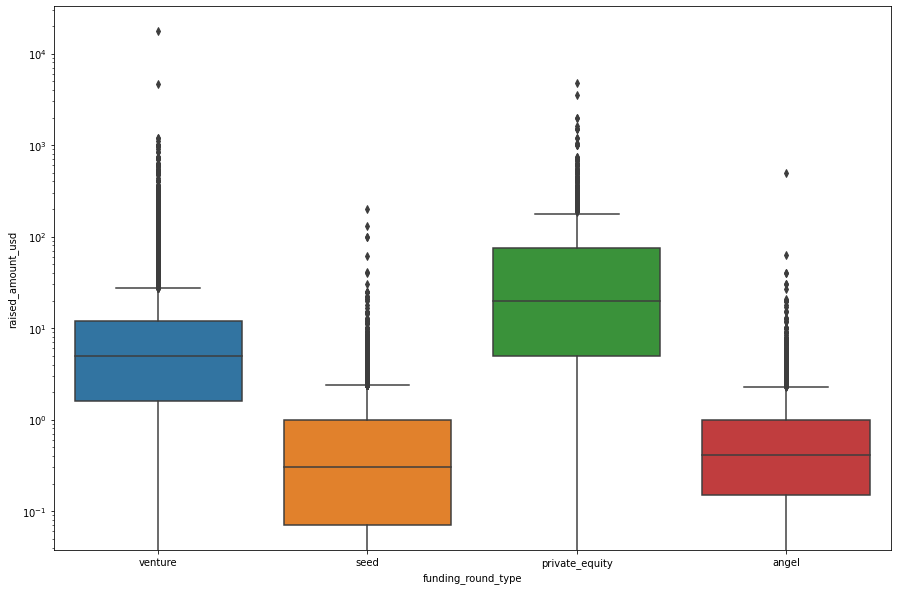

In [122]:
plt.figure(figsize=(15, 10))

sns.boxplot(x = 'funding_round_type', y = 'raised_amount_usd', data = map_data )
# comparing summary stats across four categories
plt.yscale('log')
plt.show()

### Checkpoint 3 - Goal 2 , Country Analysis


In [50]:
# Filter the funding_round_type for the most representative type i.e, venture
main_frame = main_frame[main_frame.funding_round_type == "venture"]

In [51]:
# Let's look at the country data and it's type
main_frame.dtypes

key_0                       object
funding_round_permalink     object
funding_round_type          object
funded_at                   object
raised_amount_usd          float64
permalink                   object
name                        object
category_list               object
status                      object
country_code                object
dtype: object

In [52]:
main_frame.country_code

0         IND
4         CHN
8         CAN
10        USA
11        USA
         ... 
114931    MYS
114934    USA
114936    USA
114937    AUT
114941    CHN
Name: country_code, Length: 47809, dtype: object

In [53]:
main_frame.reset_index()

,index,key_0,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code
0,0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/ORGANIZATION/-FAME,#fame,Media,operating,IND
1,4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/ORGANIZATION/0-6-COM,0-6.com,Curated Web,operating,CHN
2,8,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,Biotechnology,operating,CAN
3,10,/ORGANIZATION/0XDATA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/ORGANIZATION/0XDATA,H2O.ai,Analytics,operating,USA
4,11,/ORGANIZATION/0XDATA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/ORGANIZATION/0XDATA,H2O.ai,Analytics,operating,USA
...,...,...,...,...,...,...,...,...,...,...,...
47804,114931,/ORGANIZATION/ZYRAZ-TECHNOLOGY,/funding-round/e949f077c943db197f20e43c2eb8d0e6,venture,09-10-2009,7991547.0,/ORGANIZATION/ZYRAZ-TECHNOLOGY,Zyraz Technology,Biotechnology,closed,MYS
47805,114934,/ORGANIZATION/ZYRRA,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,18-10-2012,140500.0,/ORGANIZATION/ZYRRA,Zyrra,E-Commerce,operating,USA
47806,114936,/ORGANIZATION/ZYSTOR,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,16-12-2004,8500000.0,/ORGANIZATION/ZYSTOR,Zystor,Biotechnology,acquired,USA
47807,114937,/ORGANIZATION/ZYTOPROTEC,/funding-round/0c43e717298296d2fb334fb236300f6e,venture,29-01-2013,2686600.0,/ORGANIZATION/ZYTOPROTEC,Zytoprotec,Biotechnology,operating,AUT


In [54]:
main_frame.country_code

0         IND
4         CHN
8         CAN
10        USA
11        USA
         ... 
114931    MYS
114934    USA
114936    USA
114937    AUT
114941    CHN
Name: country_code, Length: 47809, dtype: object

In [55]:
# Change the dtype of country_code to str
main_frame.country_code = main_frame.country_code.astype('str')

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [56]:
main_frame.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending = False)[:9]

country_code
USA    4.200680e+11
CHN    3.933892e+10
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
FRA    7.226851e+09
ISR    6.854350e+09
DEU    6.306922e+09
JPN    3.167647e+09
Name: raised_amount_usd, dtype: float64

In [57]:
# From the website provided and the above data top 3 english speaking countries are USA , GBR and IND


##### A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

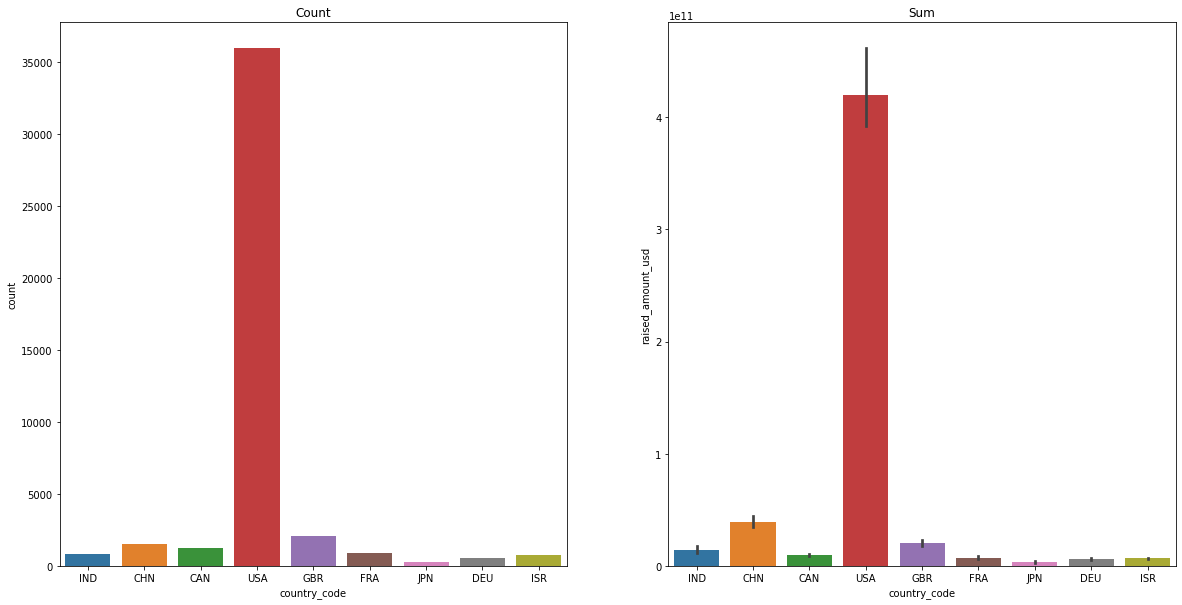

In [171]:
countries = main_frame[main_frame.country_code.isin(['USA','CHN','GBR','IND','CAN','FRA','ISR','DEU','JPN'])]

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.countplot(x="country_code", data=countries)
plt.title("Count")
plt.subplot(1, 2, 2)
sns.barplot(x="country_code", y="raised_amount_usd", data=countries, estimator=sum)
plt.title("Sum")
plt.show()

### Checkpoint 4 - Goal 3 , Sector Analysis one

In [58]:
# Let's look into the mapping data
mapping

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0


In [59]:
# Let's check for null data
mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [60]:
# Let's remove one row which contains the null value
mapping = mapping[mapping.isnull().sum(axis = 1)==0]

In [61]:
# Let's check for null data again
mapping.isnull().sum()

category_list                              0
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [62]:
# Let's Introduce a new function melt
# melt function will merge the multiple columns into two columns variables and values, lets see how
columns_to_be_melted = mapping.columns[1:]
column_to_be_seperated = np.setdiff1d(mapping.columns, columns_to_be_melted) # We need to merge all sectors apart from category list so exclude that column


In [63]:
melted_mapping = pd.melt(mapping, 
        id_vars=list(column_to_be_seperated), 
        value_vars=list(columns_to_be_melted))

In [64]:
# lets look at the new dataset
melted_mapping

,category_list,variable,value
0,3D,Automotive & Sports,0
1,3D Printing,Automotive & Sports,0
2,3D Technology,Automotive & Sports,0
3,Accounting,Automotive & Sports,0
4,Active Lifestyle,Automotive & Sports,0
...,...,...,...
6178,Wholesale,"Social, Finance, Analytics, Advertising",0
6179,Wine And Spirits,"Social, Finance, Analytics, Advertising",0
6180,Wireless,"Social, Finance, Analytics, Advertising",0
6181,Women,"Social, Finance, Analytics, Advertising",0


In [65]:
# We can see that all the various columns are merged into a column name variable and it's value is assigned to a column name value
# Let's check for the values column
melted_mapping.value.value_counts()

0    5496
1     687
Name: value, dtype: int64

In [66]:
# Here we can find that only 687 rows of data is only useful to us so removing the remaining we have
melted_mapping = melted_mapping[melted_mapping.value != 0].reset_index()

In [67]:
# convert the melted_mapping data to upper case
melted_mapping.variable = melted_mapping.variable.apply(lambda x: x.upper())
melted_mapping.category_list = melted_mapping.category_list.apply(lambda x: x.upper())


In [68]:
# Let's observe the Category List
melted_mapping.category_list.sort_values()

61                  0NOTECHNOLOGY
62     0TURAL LANGUAGE PROCESSING
63               0TURAL RESOURCES
319                     0VIGATION
227                            3D
                  ...            
531                     WHOLESALE
162              WINE AND SPIRITS
163                      WIRELESS
532                         WOMEN
533                  YOUNG ADULTS
Name: category_list, Length: 687, dtype: object

In [69]:
# We can observe that 0NOTECHNOLOGY is not a word and simillarly 0VIGATION is also not a word
# if we notice that , we can see that NA is by mistake replaced with 0 
# So we will replace 0 with NA
# Also we will see that if there is any other value will not be affected by replacing 0 to NA so let's have a look on the category_list where 0 is present
melted_mapping[melted_mapping.category_list.str.contains('0')]

,index,category_list,variable,value
44,1613,ENERGY MA0GEMENT,CLEANTECH / SEMICONDUCTORS,1
61,1844,0NOTECHNOLOGY,CLEANTECH / SEMICONDUCTORS,1
62,1845,0TURAL LANGUAGE PROCESSING,CLEANTECH / SEMICONDUCTORS,1
63,1846,0TURAL RESOURCES,CLEANTECH / SEMICONDUCTORS,1
71,2045,WASTE MA0GEMENT,CLEANTECH / SEMICONDUCTORS,1
98,2258,DIGITAL RIGHTS MA0GEMENT,ENTERTAINMENT,1
99,2259,DIGITAL SIG0GE,ENTERTAINMENT,1
102,2283,EDUCATIO0L GAMES,ENTERTAINMENT,1
106,2316,EVENT MA0GEMENT,ENTERTAINMENT,1
165,2767,ALTER0TIVE MEDICINE,HEALTH,1


In [70]:
# Here ENTERPRISE 2.0 is data that is present here with 0 if we replace 0 to NA so when we replace the data we have
# new data with ENTERPRISE 2.NA , so we will again change 2.NA to 0

melted_mapping.category_list = melted_mapping.category_list.apply(lambda x : x.replace('0','NA'))
melted_mapping.category_list = melted_mapping.category_list.apply(lambda x : x.replace('2.NA','2.0'))

In [71]:
# Now let's look the same data again
melted_mapping[(melted_mapping.category_list.str.contains('0'))|(melted_mapping.category_list.str.contains('NA'))]

,index,category_list,variable,value
44,1613,ENERGY MANAGEMENT,CLEANTECH / SEMICONDUCTORS,1
61,1844,NANOTECHNOLOGY,CLEANTECH / SEMICONDUCTORS,1
62,1845,NATURAL LANGUAGE PROCESSING,CLEANTECH / SEMICONDUCTORS,1
63,1846,NATURAL RESOURCES,CLEANTECH / SEMICONDUCTORS,1
71,2045,WASTE MANAGEMENT,CLEANTECH / SEMICONDUCTORS,1
98,2258,DIGITAL RIGHTS MANAGEMENT,ENTERTAINMENT,1
99,2259,DIGITAL SIGNAGE,ENTERTAINMENT,1
102,2283,EDUCATIONAL GAMES,ENTERTAINMENT,1
106,2316,EVENT MANAGEMENT,ENTERTAINMENT,1
165,2767,ALTERNATIVE MEDICINE,HEALTH,1


In [72]:
melted_mapping

,index,category_list,variable,value
0,7,ADVENTURE TRAVEL,AUTOMOTIVE & SPORTS,1
1,13,AEROSPACE,AUTOMOTIVE & SPORTS,1
2,44,AUTO,AUTOMOTIVE & SPORTS,1
3,45,AUTOMATED KIOSK,AUTOMOTIVE & SPORTS,1
4,46,AUTOMOTIVE,AUTOMOTIVE & SPORTS,1
...,...,...,...,...
682,6112,SOCIAL RECRUITING,"SOCIAL, FINANCE, ANALYTICS, ADVERTISING",1
683,6113,SOCIAL TELEVISION,"SOCIAL, FINANCE, ANALYTICS, ADVERTISING",1
684,6114,SOCIAL TRAVEL,"SOCIAL, FINANCE, ANALYTICS, ADVERTISING",1
685,6125,STOCK EXCHANGES,"SOCIAL, FINANCE, ANALYTICS, ADVERTISING",1


In [73]:
# Now we are ok with the data
# For our purpose we don't want the column value so will drop the value column and also rename the variable to main_sector
melted_mapping = melted_mapping.drop(['value'], axis=1)
melted_mapping = melted_mapping.rename(columns={'variable':'main_sector'})

In [74]:
# Now let's check the data again
melted_mapping

,index,category_list,main_sector
0,7,ADVENTURE TRAVEL,AUTOMOTIVE & SPORTS
1,13,AEROSPACE,AUTOMOTIVE & SPORTS
2,44,AUTO,AUTOMOTIVE & SPORTS
3,45,AUTOMATED KIOSK,AUTOMOTIVE & SPORTS
4,46,AUTOMOTIVE,AUTOMOTIVE & SPORTS
...,...,...,...
682,6112,SOCIAL RECRUITING,"SOCIAL, FINANCE, ANALYTICS, ADVERTISING"
683,6113,SOCIAL TELEVISION,"SOCIAL, FINANCE, ANALYTICS, ADVERTISING"
684,6114,SOCIAL TRAVEL,"SOCIAL, FINANCE, ANALYTICS, ADVERTISING"
685,6125,STOCK EXCHANGES,"SOCIAL, FINANCE, ANALYTICS, ADVERTISING"


In [75]:
# Now let's look into the main_frame category_list data
main_frame.category_list

0                       Media
4                 Curated Web
8               Biotechnology
10                  Analytics
11                  Analytics
                 ...         
114931          Biotechnology
114934             E-Commerce
114936          Biotechnology
114937          Biotechnology
114941    Enterprise Software
Name: category_list, Length: 47809, dtype: object

In [76]:
# Let's convert main_frame category_list data to upper case
main_frame.category_list = main_frame.category_list.apply(lambda x: x.upper())

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [77]:
# Looking into the data again
main_frame.reset_index()

,index,key_0,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code
0,0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/ORGANIZATION/-FAME,#fame,MEDIA,operating,IND
1,4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/ORGANIZATION/0-6-COM,0-6.com,CURATED WEB,operating,CHN
2,8,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,BIOTECHNOLOGY,operating,CAN
3,10,/ORGANIZATION/0XDATA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/ORGANIZATION/0XDATA,H2O.ai,ANALYTICS,operating,USA
4,11,/ORGANIZATION/0XDATA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/ORGANIZATION/0XDATA,H2O.ai,ANALYTICS,operating,USA
...,...,...,...,...,...,...,...,...,...,...,...
47804,114931,/ORGANIZATION/ZYRAZ-TECHNOLOGY,/funding-round/e949f077c943db197f20e43c2eb8d0e6,venture,09-10-2009,7991547.0,/ORGANIZATION/ZYRAZ-TECHNOLOGY,Zyraz Technology,BIOTECHNOLOGY,closed,MYS
47805,114934,/ORGANIZATION/ZYRRA,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,18-10-2012,140500.0,/ORGANIZATION/ZYRRA,Zyrra,E-COMMERCE,operating,USA
47806,114936,/ORGANIZATION/ZYSTOR,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,16-12-2004,8500000.0,/ORGANIZATION/ZYSTOR,Zystor,BIOTECHNOLOGY,acquired,USA
47807,114937,/ORGANIZATION/ZYTOPROTEC,/funding-round/0c43e717298296d2fb334fb236300f6e,venture,29-01-2013,2686600.0,/ORGANIZATION/ZYTOPROTEC,Zytoprotec,BIOTECHNOLOGY,operating,AUT


In [78]:
# Remove column key_0 as it is duplicate of permalink
main_frame = main_frame.drop('key_0', axis=1)


In [79]:
# Create a primary sector from the category list
main_frame['primary_sector'] = main_frame.category_list.apply(lambda x : x.split('|')[0])

In [80]:
# Let's see the updated main_frame
main_frame

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/ORGANIZATION/-FAME,#fame,MEDIA,operating,IND,MEDIA
4,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/ORGANIZATION/0-6-COM,0-6.com,CURATED WEB,operating,CHN,CURATED WEB
8,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,BIOTECHNOLOGY,operating,CAN,BIOTECHNOLOGY
10,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/ORGANIZATION/0XDATA,H2O.ai,ANALYTICS,operating,USA,ANALYTICS
11,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/ORGANIZATION/0XDATA,H2O.ai,ANALYTICS,operating,USA,ANALYTICS
...,...,...,...,...,...,...,...,...,...,...
114931,/funding-round/e949f077c943db197f20e43c2eb8d0e6,venture,09-10-2009,7991547.0,/ORGANIZATION/ZYRAZ-TECHNOLOGY,Zyraz Technology,BIOTECHNOLOGY,closed,MYS,BIOTECHNOLOGY
114934,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,18-10-2012,140500.0,/ORGANIZATION/ZYRRA,Zyrra,E-COMMERCE,operating,USA,E-COMMERCE
114936,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,16-12-2004,8500000.0,/ORGANIZATION/ZYSTOR,Zystor,BIOTECHNOLOGY,acquired,USA,BIOTECHNOLOGY
114937,/funding-round/0c43e717298296d2fb334fb236300f6e,venture,29-01-2013,2686600.0,/ORGANIZATION/ZYTOPROTEC,Zytoprotec,BIOTECHNOLOGY,operating,AUT,BIOTECHNOLOGY


In [81]:
# Now concat the data from melted_mapping
main_frame = main_frame.merge(melted_mapping, how="left" , left_on= "primary_sector", right_on="category_list")

In [82]:
# Our data looks like below 
main_frame

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list_x,status,country_code,primary_sector,index,category_list_y,main_sector
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/ORGANIZATION/-FAME,#fame,MEDIA,operating,IND,MEDIA,2494.0,MEDIA,ENTERTAINMENT
1,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/ORGANIZATION/0-6-COM,0-6.com,CURATED WEB,operating,CHN,CURATED WEB,4289.0,CURATED WEB,"NEWS, SEARCH AND MESSAGING"
2,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,BIOTECHNOLOGY,operating,CAN,BIOTECHNOLOGY,1439.0,BIOTECHNOLOGY,CLEANTECH / SEMICONDUCTORS
3,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/ORGANIZATION/0XDATA,H2O.ai,ANALYTICS,operating,USA,ANALYTICS,5517.0,ANALYTICS,"SOCIAL, FINANCE, ANALYTICS, ADVERTISING"
4,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/ORGANIZATION/0XDATA,H2O.ai,ANALYTICS,operating,USA,ANALYTICS,5517.0,ANALYTICS,"SOCIAL, FINANCE, ANALYTICS, ADVERTISING"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47804,/funding-round/e949f077c943db197f20e43c2eb8d0e6,venture,09-10-2009,7991547.0,/ORGANIZATION/ZYRAZ-TECHNOLOGY,Zyraz Technology,BIOTECHNOLOGY,closed,MYS,BIOTECHNOLOGY,1439.0,BIOTECHNOLOGY,CLEANTECH / SEMICONDUCTORS
47805,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,18-10-2012,140500.0,/ORGANIZATION/ZYRRA,Zyrra,E-COMMERCE,operating,USA,E-COMMERCE,5023.0,E-COMMERCE,OTHERS
47806,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,16-12-2004,8500000.0,/ORGANIZATION/ZYSTOR,Zystor,BIOTECHNOLOGY,acquired,USA,BIOTECHNOLOGY,1439.0,BIOTECHNOLOGY,CLEANTECH / SEMICONDUCTORS
47807,/funding-round/0c43e717298296d2fb334fb236300f6e,venture,29-01-2013,2686600.0,/ORGANIZATION/ZYTOPROTEC,Zytoprotec,BIOTECHNOLOGY,operating,AUT,BIOTECHNOLOGY,1439.0,BIOTECHNOLOGY,CLEANTECH / SEMICONDUCTORS


In [83]:
# After looking into the data_set we can see that there are multiple columns that need to be deleted, so dropping the unwanted columns
main_frame = main_frame.drop(['index',	'category_list_y'], axis=1)


In [84]:
# Rename category_list_x to category_list
main_frame = main_frame.rename(columns={'category_list_x':'category_list'})

In [85]:
main_frame

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector,main_sector
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/ORGANIZATION/-FAME,#fame,MEDIA,operating,IND,MEDIA,ENTERTAINMENT
1,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/ORGANIZATION/0-6-COM,0-6.com,CURATED WEB,operating,CHN,CURATED WEB,"NEWS, SEARCH AND MESSAGING"
2,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,BIOTECHNOLOGY,operating,CAN,BIOTECHNOLOGY,CLEANTECH / SEMICONDUCTORS
3,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/ORGANIZATION/0XDATA,H2O.ai,ANALYTICS,operating,USA,ANALYTICS,"SOCIAL, FINANCE, ANALYTICS, ADVERTISING"
4,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/ORGANIZATION/0XDATA,H2O.ai,ANALYTICS,operating,USA,ANALYTICS,"SOCIAL, FINANCE, ANALYTICS, ADVERTISING"
...,...,...,...,...,...,...,...,...,...,...,...
47804,/funding-round/e949f077c943db197f20e43c2eb8d0e6,venture,09-10-2009,7991547.0,/ORGANIZATION/ZYRAZ-TECHNOLOGY,Zyraz Technology,BIOTECHNOLOGY,closed,MYS,BIOTECHNOLOGY,CLEANTECH / SEMICONDUCTORS
47805,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,18-10-2012,140500.0,/ORGANIZATION/ZYRRA,Zyrra,E-COMMERCE,operating,USA,E-COMMERCE,OTHERS
47806,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,16-12-2004,8500000.0,/ORGANIZATION/ZYSTOR,Zystor,BIOTECHNOLOGY,acquired,USA,BIOTECHNOLOGY,CLEANTECH / SEMICONDUCTORS
47807,/funding-round/0c43e717298296d2fb334fb236300f6e,venture,29-01-2013,2686600.0,/ORGANIZATION/ZYTOPROTEC,Zytoprotec,BIOTECHNOLOGY,operating,AUT,BIOTECHNOLOGY,CLEANTECH / SEMICONDUCTORS


##### Now we have all the main_sector and primary_sector so sector analysis part one is completed here

### Checkpoint 5 - Goal 3 , Sector Analysis two

In [86]:
main_frame

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector,main_sector
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/ORGANIZATION/-FAME,#fame,MEDIA,operating,IND,MEDIA,ENTERTAINMENT
1,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/ORGANIZATION/0-6-COM,0-6.com,CURATED WEB,operating,CHN,CURATED WEB,"NEWS, SEARCH AND MESSAGING"
2,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,BIOTECHNOLOGY,operating,CAN,BIOTECHNOLOGY,CLEANTECH / SEMICONDUCTORS
3,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/ORGANIZATION/0XDATA,H2O.ai,ANALYTICS,operating,USA,ANALYTICS,"SOCIAL, FINANCE, ANALYTICS, ADVERTISING"
4,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/ORGANIZATION/0XDATA,H2O.ai,ANALYTICS,operating,USA,ANALYTICS,"SOCIAL, FINANCE, ANALYTICS, ADVERTISING"
...,...,...,...,...,...,...,...,...,...,...,...
47804,/funding-round/e949f077c943db197f20e43c2eb8d0e6,venture,09-10-2009,7991547.0,/ORGANIZATION/ZYRAZ-TECHNOLOGY,Zyraz Technology,BIOTECHNOLOGY,closed,MYS,BIOTECHNOLOGY,CLEANTECH / SEMICONDUCTORS
47805,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,18-10-2012,140500.0,/ORGANIZATION/ZYRRA,Zyrra,E-COMMERCE,operating,USA,E-COMMERCE,OTHERS
47806,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,16-12-2004,8500000.0,/ORGANIZATION/ZYSTOR,Zystor,BIOTECHNOLOGY,acquired,USA,BIOTECHNOLOGY,CLEANTECH / SEMICONDUCTORS
47807,/funding-round/0c43e717298296d2fb334fb236300f6e,venture,29-01-2013,2686600.0,/ORGANIZATION/ZYTOPROTEC,Zytoprotec,BIOTECHNOLOGY,operating,AUT,BIOTECHNOLOGY,CLEANTECH / SEMICONDUCTORS


In [87]:
# Create three different data_sets for IND, GBR and IND (We had three top countries) with filter of 
D1 = main_frame[(main_frame.country_code == 'USA') & (main_frame.raised_amount_usd <= 15000000) & (main_frame.raised_amount_usd >= 5000000)]

In [88]:
round(D1.raised_amount_usd.describe(),2)

count       12064.00
mean      8932906.52
std       3075737.87
min       5000000.00
25%       6001191.75
50%       8300000.00
75%      11000000.00
max      15000000.00
Name: raised_amount_usd, dtype: float64

In [89]:
D2 = main_frame[(main_frame.country_code == 'GBR') & (main_frame.raised_amount_usd <= 15000000) & (main_frame.raised_amount_usd >= 5000000)]
round(D2.raised_amount_usd.describe(),2)

count         621.00
mean      8661962.47
std       2867166.77
min       5000000.00
25%       6084330.00
50%       8000000.00
75%      10606760.00
max      15000000.00
Name: raised_amount_usd, dtype: float64

In [90]:
D3 = main_frame[(main_frame.country_code == 'IND') & (main_frame.raised_amount_usd <= 15000000) & (main_frame.raised_amount_usd >= 5000000)]
round(D3.raised_amount_usd.describe(),2)

count         328.00
mean      8992510.98
std       3219811.35
min       5000000.00
25%       6000000.00
50%       8700000.00
75%      10555000.00
max      15000000.00
Name: raised_amount_usd, dtype: float64

In [91]:
# Adding count and sum of Raised_amount_usd in all data_Sets D1,D2,D3

# Get sum and count of USA data_Set
usa_count = D1.groupby(['country_code', 'main_sector']).raised_amount_usd.agg(['count', 'sum']).sort_values(by = 'count', ascending = False)


In [92]:
# Get sum and count of GBR data_Set

gbr_count = D2.groupby(['country_code', 'main_sector']).raised_amount_usd.agg(['count', 'sum']).sort_values(by = 'count', ascending = False)


In [93]:
# Get sum and count of IND data_Set

ind_count = D3.groupby(['country_code', 'main_sector']).raised_amount_usd.agg(['count', 'sum']).sort_values(by = 'count', ascending = False)

In [94]:
# Merging all sum and count of top three countries to their respective data set
D1 = D1.merge(usa_count, how="left" , on= "main_sector")
D2 = D2.merge(gbr_count, how="left" , on= "main_sector")
D3 = D3.merge(ind_count, how="left" , on= "main_sector")

In [95]:
D1

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector,main_sector,count,sum
0,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,/ORGANIZATION/0XDATA,H2O.ai,ANALYTICS,operating,USA,ANALYTICS,"SOCIAL, FINANCE, ANALYTICS, ADVERTISING",2714.0,2.380738e+10
1,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,/ORGANIZATION/1-MAINSTREAM,1 Mainstream,APPS|CABLE|DISTRIBUTION|SOFTWARE,acquired,USA,APPS,"NEWS, SEARCH AND MESSAGING",1583.0,1.397157e+10
2,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,16-12-2014,11999347.0,/ORGANIZATION/128-TECHNOLOGY,128 Technology,SERVICE PROVIDERS|TECHNOLOGY,operating,USA,SERVICE PROVIDERS,OTHERS,2950.0,2.632101e+10
3,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,15-10-2013,15000000.0,/ORGANIZATION/1366-TECHNOLOGIES,1366 Technologies,MANUFACTURING,operating,USA,MANUFACTURING,MANUFACTURING,799.0,7.258553e+09
4,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,09-04-2015,5000000.0,/ORGANIZATION/1366-TECHNOLOGIES,1366 Technologies,MANUFACTURING,operating,USA,MANUFACTURING,MANUFACTURING,799.0,7.258553e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12059,/funding-round/8411431b5a0389a874e3fae93016c089,venture,24-04-2010,15000000.0,/ORGANIZATION/ZYNGA,Zynga,FACEBOOK APPLICATIONS|GAMES|NETWORKING|TECHNOLOGY,ipo,USA,FACEBOOK APPLICATIONS,"SOCIAL, FINANCE, ANALYTICS, ADVERTISING",2714.0,2.380738e+10
12060,/funding-round/eb198261da812bc8d3bf475ccec44000,venture,12-02-2008,5026000.0,/ORGANIZATION/ZYNGA,Zynga,FACEBOOK APPLICATIONS|GAMES|NETWORKING|TECHNOLOGY,ipo,USA,FACEBOOK APPLICATIONS,"SOCIAL, FINANCE, ANALYTICS, ADVERTISING",2714.0,2.380738e+10
12061,/funding-round/4191cb5258d3863b0212d1083881da64,venture,30-06-2013,12000000.0,/ORGANIZATION/ZYOMYX-INC,ZYOMYX,BIOTECHNOLOGY,operating,USA,BIOTECHNOLOGY,CLEANTECH / SEMICONDUCTORS,2350.0,2.163343e+10
12062,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,11-07-2013,14219999.0,/ORGANIZATION/ZYOMYX-INC,ZYOMYX,BIOTECHNOLOGY,operating,USA,BIOTECHNOLOGY,CLEANTECH / SEMICONDUCTORS,2350.0,2.163343e+10


In [96]:
# Let's look into the data
D1.sort_values(by = ['count','sum'], ascending=False)

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector,main_sector,count,sum
2,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,16-12-2014,11999347.0,/ORGANIZATION/128-TECHNOLOGY,128 Technology,SERVICE PROVIDERS|TECHNOLOGY,operating,USA,SERVICE PROVIDERS,OTHERS,2950.0,2.632101e+10
8,/funding-round/b84bb882ca873f5fb96535671981196d,venture,16-04-2002,14000000.0,/ORGANIZATION/170-SYSTEMS,170 Systems,SOFTWARE,acquired,USA,SOFTWARE,OTHERS,2950.0,2.632101e+10
9,/funding-round/69690484f51e15bc27ff52bfe472cd96,venture,01-01-2011,5000000.0,/ORGANIZATION/17ZUOYE,17zuoye,EDUCATION|LANGUAGE LEARNING,operating,USA,EDUCATION,OTHERS,2950.0,2.632101e+10
10,/funding-round/8d87f771e938e0f31641bd600abbafca,venture,01-09-2013,10000000.0,/ORGANIZATION/17ZUOYE,17zuoye,EDUCATION|LANGUAGE LEARNING,operating,USA,EDUCATION,OTHERS,2950.0,2.632101e+10
12,/funding-round/292b074d073fdd9c7e9d8f372c3aa5f6,venture,24-01-2014,15000000.0,/ORGANIZATION/1STDIBS,1stdibs,E-COMMERCE,operating,USA,E-COMMERCE,OTHERS,2950.0,2.632101e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11944,/funding-round/b525cff62d6f469611ae43bb6e04f798,venture,01-10-2012,6000000.0,/ORGANIZATION/ZERO-MOTORCYCLES,Zero Motorcycles Inc.,AUTOMOTIVE|ELECTRIC VEHICLES,operating,USA,AUTOMOTIVE,AUTOMOTIVE & SPORTS,167.0,1.454104e+09
11945,/funding-round/dc07522ab4a2eccb7df43036320ab538,venture,17-07-2013,6500000.0,/ORGANIZATION/ZERO-MOTORCYCLES,Zero Motorcycles Inc.,AUTOMOTIVE|ELECTRIC VEHICLES,operating,USA,AUTOMOTIVE,AUTOMOTIVE & SPORTS,167.0,1.454104e+09
11946,/funding-round/e98f34cdc955ff37afc6675b6255c7ed,venture,01-04-2012,9000000.0,/ORGANIZATION/ZERO-MOTORCYCLES,Zero Motorcycles Inc.,AUTOMOTIVE|ELECTRIC VEHICLES,operating,USA,AUTOMOTIVE,AUTOMOTIVE & SPORTS,167.0,1.454104e+09
12000,/funding-round/14d497173d08c86142694f21baa1e091,venture,05-09-2014,6400000.0,/ORGANIZATION/ZIRX,ZIRX,CARS|PARKING,operating,USA,CARS,AUTOMOTIVE & SPORTS,167.0,1.454104e+09


In [97]:
D2.sort_values(by = ['count','sum'], ascending=False)

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector,main_sector,count,sum
12,/funding-round/064999587157b0ceae7843204a105d6d,venture,28-09-2015,13359377.0,/ORGANIZATION/ACS-CLOTHING,ACS Clothing,E-COMMERCE,operating,GBR,E-COMMERCE,OTHERS,147,1.283624e+09
13,/funding-round/875b4295af2381558cec9d97f86fe3e4,venture,02-03-2014,12879637.0,/ORGANIZATION/ACS-CLOTHING,ACS Clothing,E-COMMERCE,operating,GBR,E-COMMERCE,OTHERS,147,1.283624e+09
18,/funding-round/57ca5d05989850fb1109b277cb6ae54e,venture,30-06-2010,10000000.0,/ORGANIZATION/AEPONA,Aepona,WEB HOSTING,acquired,GBR,WEB HOSTING,OTHERS,147,1.283624e+09
19,/funding-round/ad79a10f4c3f231375454da6393ec564,venture,05-02-2007,10000000.0,/ORGANIZATION/AEPONA,Aepona,WEB HOSTING,acquired,GBR,WEB HOSTING,OTHERS,147,1.283624e+09
22,/funding-round/0db504d02c87c2b963283fd3c6d17594,venture,22-01-2008,13000000.0,/ORGANIZATION/ALFRESCO,Alfresco,DOCUMENT MANAGEMENT|ENTERPRISES|ENTERPRISE SOF...,operating,GBR,DOCUMENT MANAGEMENT,OTHERS,147,1.283624e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,/funding-round/e072b4cca216b8aed4deec6aeb1053f5,venture,11-10-2010,13000000.0,/ORGANIZATION/LIGHT-BLUE-OPTICS,Light Blue Optics,AUTOMOTIVE|CONSUMER ELECTRONICS|HARDWARE + SOF...,operating,GBR,AUTOMOTIVE,AUTOMOTIVE & SPORTS,16,1.670516e+08
285,/funding-round/350da83566d70fe8bc21e4c07f758b63,venture,10-01-2012,9278918.0,/ORGANIZATION/MADE-COM,made.com,DESIGN|E-COMMERCE|FURNITURE|HOME & GARDEN,operating,GBR,DESIGN,AUTOMOTIVE & SPORTS,16,1.670516e+08
431,/funding-round/6e997bdaeaf11622a4522b493cb5d01d,venture,05-08-2015,9345794.0,/ORGANIZATION/PRODRIVE,Prodrive,AUTOMOTIVE,operating,GBR,AUTOMOTIVE,AUTOMOTIVE & SPORTS,16,1.670516e+08
506,/funding-round/c8296d1dd3529cf84b85324c4e0c3b3e,venture,08-03-2007,12430126.0,/ORGANIZATION/STREETCAR,Streetcar,AUTOMOTIVE,acquired,GBR,AUTOMOTIVE,AUTOMOTIVE & SPORTS,16,1.670516e+08


In [98]:
D3.sort_values(by = ['count','sum'], ascending=False)

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector,main_sector,count,sum
1,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,15-11-2012,6369507.0,/ORGANIZATION/21DIAMONDS-INDIA,21Diamonds,E-COMMERCE,operating,IND,E-COMMERCE,OTHERS,110,1.013410e+09
7,/funding-round/81b50a403d5d2293715fe9b0ce4db5d3,venture,03-07-2015,5000000.0,/ORGANIZATION/AMEYO,Ameyo,SOFTWARE,operating,IND,SOFTWARE,OTHERS,110,1.013410e+09
13,/funding-round/29152fc812013ef482c93f6dd47f58ff,venture,29-06-2006,10000000.0,/ORGANIZATION/APPLABS,AppLabs,SOFTWARE,acquired,IND,SOFTWARE,OTHERS,110,1.013410e+09
14,/funding-round/4979e1bb00ddc452753682273fd4466c,venture,10-04-2014,5000000.0,/ORGANIZATION/APPSDAILY-SOLUTIONS,Appsdaily Solutions,SOFTWARE,operating,IND,SOFTWARE,OTHERS,110,1.013410e+09
15,/funding-round/2a3a5fb06cd92186431fbe8fb6dfd23b,venture,24-01-2014,12000000.0,/ORGANIZATION/ARIISTO,Ariisto,REAL ESTATE,operating,IND,REAL ESTATE,OTHERS,110,1.013410e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,/funding-round/4688f3f8860d92330aa64f6f6aa0dd39,venture,06-02-2008,6500000.0,/ORGANIZATION/MISTRAL-SOLUTIONS,Mistral Solutions,AEROSPACE|DEFENSE|EMBEDDED HARDWARE AND SOFTWA...,operating,IND,AEROSPACE,AUTOMOTIVE & SPORTS,13,1.369000e+08
284,/funding-round/29b13629e3dd0f4d53ab84a6c89548c2,venture,18-04-2014,10000000.0,/ORGANIZATION/TAXIFORSURE-COM,TaxiForSure.com,AUTOMOTIVE|TRANSPORTATION,acquired,IND,AUTOMOTIVE,AUTOMOTIVE & SPORTS,13,1.369000e+08
290,/funding-round/a8423b53ae8e4995bd52a48eaf5014e0,venture,05-08-2013,6400000.0,/ORGANIZATION/TONBO-IMAGING,Tonbo Imaging,DESIGN,operating,IND,DESIGN,AUTOMOTIVE & SPORTS,13,1.369000e+08
324,/funding-round/a7cdd2e85e583a992e021b323b7374ad,venture,31-10-2014,8000000.0,/ORGANIZATION/ZOOMCAR-INDIA,ZoomCar,AUTOMOTIVE|CONSUMERS|E-COMMERCE|TRANSPORTATION,operating,IND,AUTOMOTIVE,AUTOMOTIVE & SPORTS,13,1.369000e+08


In [99]:
usa_count

count           sum
country_code main_sector                                                 
USA          OTHERS                                    2950  2.632101e+10
             SOCIAL, FINANCE, ANALYTICS, ADVERTISING   2714  2.380738e+10
             CLEANTECH / SEMICONDUCTORS                2350  2.163343e+10
             NEWS, SEARCH AND MESSAGING                1583  1.397157e+10
             HEALTH                                     909  8.211859e+09
             MANUFACTURING                              799  7.258553e+09
             ENTERTAINMENT                              591  5.099198e+09
             AUTOMOTIVE & SPORTS                        167  1.454104e+09

In [100]:
# Getting the top country name from companies from all data
D1[(D1.main_sector == "OTHERS")].groupby([D1.name])['raised_amount_usd'].sum().sort_values(ascending = False)

name
Virtustream            64300000.0
Capella Photonics      54968051.0
AirTight Networks      54201907.0
deCarta                52100000.0
Black Duck Software    51000000.0
                          ...    
Campus Explorer         5000000.0
Campus Quad             5000000.0
Oculan                  5000000.0
NuView Systems          5000000.0
Dolls Kill              5000000.0
Name: raised_amount_usd, Length: 2049, dtype: float64

In [101]:
D1[(D1.main_sector == "SOCIAL, FINANCE, ANALYTICS, ADVERTISING")].groupby([D1.name])['raised_amount_usd'].sum().sort_values(ascending = False)

name
SST Inc. (Formerly ShotSpotter)    67933006.0
Demandbase                         63000000.0
Intacct                            61800000.0
NetBase Solutions                  60600000.0
Lotame                             59700000.0
                                      ...    
Jellyvision                         5000000.0
Yerdle                              5000000.0
EquityMetrix                        5000000.0
Apester                             5000000.0
WibiData                            5000000.0
Name: raised_amount_usd, Length: 1847, dtype: float64

In [102]:
gbr_count

count           sum
country_code main_sector                                                 
GBR          OTHERS                                     147  1.283624e+09
             SOCIAL, FINANCE, ANALYTICS, ADVERTISING    133  1.089404e+09
             CLEANTECH / SEMICONDUCTORS                 130  1.163990e+09
             NEWS, SEARCH AND MESSAGING                  73  6.157462e+08
             ENTERTAINMENT                               56  4.827847e+08
             MANUFACTURING                               42  3.619403e+08
             HEALTH                                      24  2.145375e+08
             AUTOMOTIVE & SPORTS                         16  1.670516e+08

In [103]:
D2[(D2.main_sector == "OTHERS")].groupby([D2.name])['raised_amount_usd'].sum().sort_values(ascending = False)

name
Electric Cloud             37000000.0
SenSage                    36250000.0
Enigmatec                  32500000.0
SilverRail Technologies    29000000.0
OpenCloud                  27972766.0
                              ...    
Bacula Systems              5000000.0
Vector Watch                5000000.0
PhotoBox                    5000000.0
The Filter                  5000000.0
BullGuard                   5000000.0
Name: raised_amount_usd, Length: 120, dtype: float64

In [104]:
D2[(D2.main_sector == "SOCIAL, FINANCE, ANALYTICS, ADVERTISING")].groupby([D2.name])['raised_amount_usd'].sum().sort_values(ascending = False)

name
Celltick Technologies    37500000.0
myThings                 34000000.0
Zopa                     32900000.0
VisualDNA                28550000.0
MarketInvoice            25553007.0
                            ...    
Rangespan                 5000000.0
DueDil                    5000000.0
Tamoco                    5000000.0
MOO.COM                   5000000.0
The Fizzback Group        5000000.0
Name: raised_amount_usd, Length: 104, dtype: float64

In [105]:
ind_count

count           sum
country_code main_sector                                                 
IND          OTHERS                                     110  1.013410e+09
             SOCIAL, FINANCE, ANALYTICS, ADVERTISING     60  5.505496e+08
             NEWS, SEARCH AND MESSAGING                  52  4.338345e+08
             ENTERTAINMENT                               33  2.808300e+08
             MANUFACTURING                               21  2.009000e+08
             CLEANTECH / SEMICONDUCTORS                  20  1.653800e+08
             HEALTH                                      19  1.677400e+08
             AUTOMOTIVE & SPORTS                         13  1.369000e+08

In [106]:
D3[D3.main_sector == "OTHERS"].groupby(D3.name)['raised_amount_usd'].count().sort_values(ascending = False)

name
Myntra                                     4
Pepperfry.com                              3
FirstCry.com                               3
CommonFloor                                3
Comat Technologies                         2
                                          ..
RezNext                                    1
Sanghvi                                    1
Sapience Analytics Private Limited         1
Satin Creditcare Network Limited (SCNL)    1
21Diamonds                                 1
Name: raised_amount_usd, Length: 88, dtype: int64

In [107]:
D3[D3.main_sector == "SOCIAL, FINANCE, ANALYTICS, ADVERTISING"].groupby(D3.name)['raised_amount_usd'].count().sort_values(ascending = False)

name
Manthan Systems                                   4
Komli Media                                       3
Grameen Financial Services                        2
Eka Software Solutions                            2
inTarvo                                           2
BankBazaar.com                                    2
ShopClues.com                                     2
Microland                                         2
Qyuki                                             2
FundsIndia                                        1
Financial Information Network & Operations Pvt    1
Excellence4u                                      1
Epiance                                           1
Emergent Ventures India                           1
Eko India Financial Services                      1
yepme.com                                         1
EBS Worldwide Services                            1
Furlenco                                          1
Coverfox Insurance                                1
Capital

##### A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT).

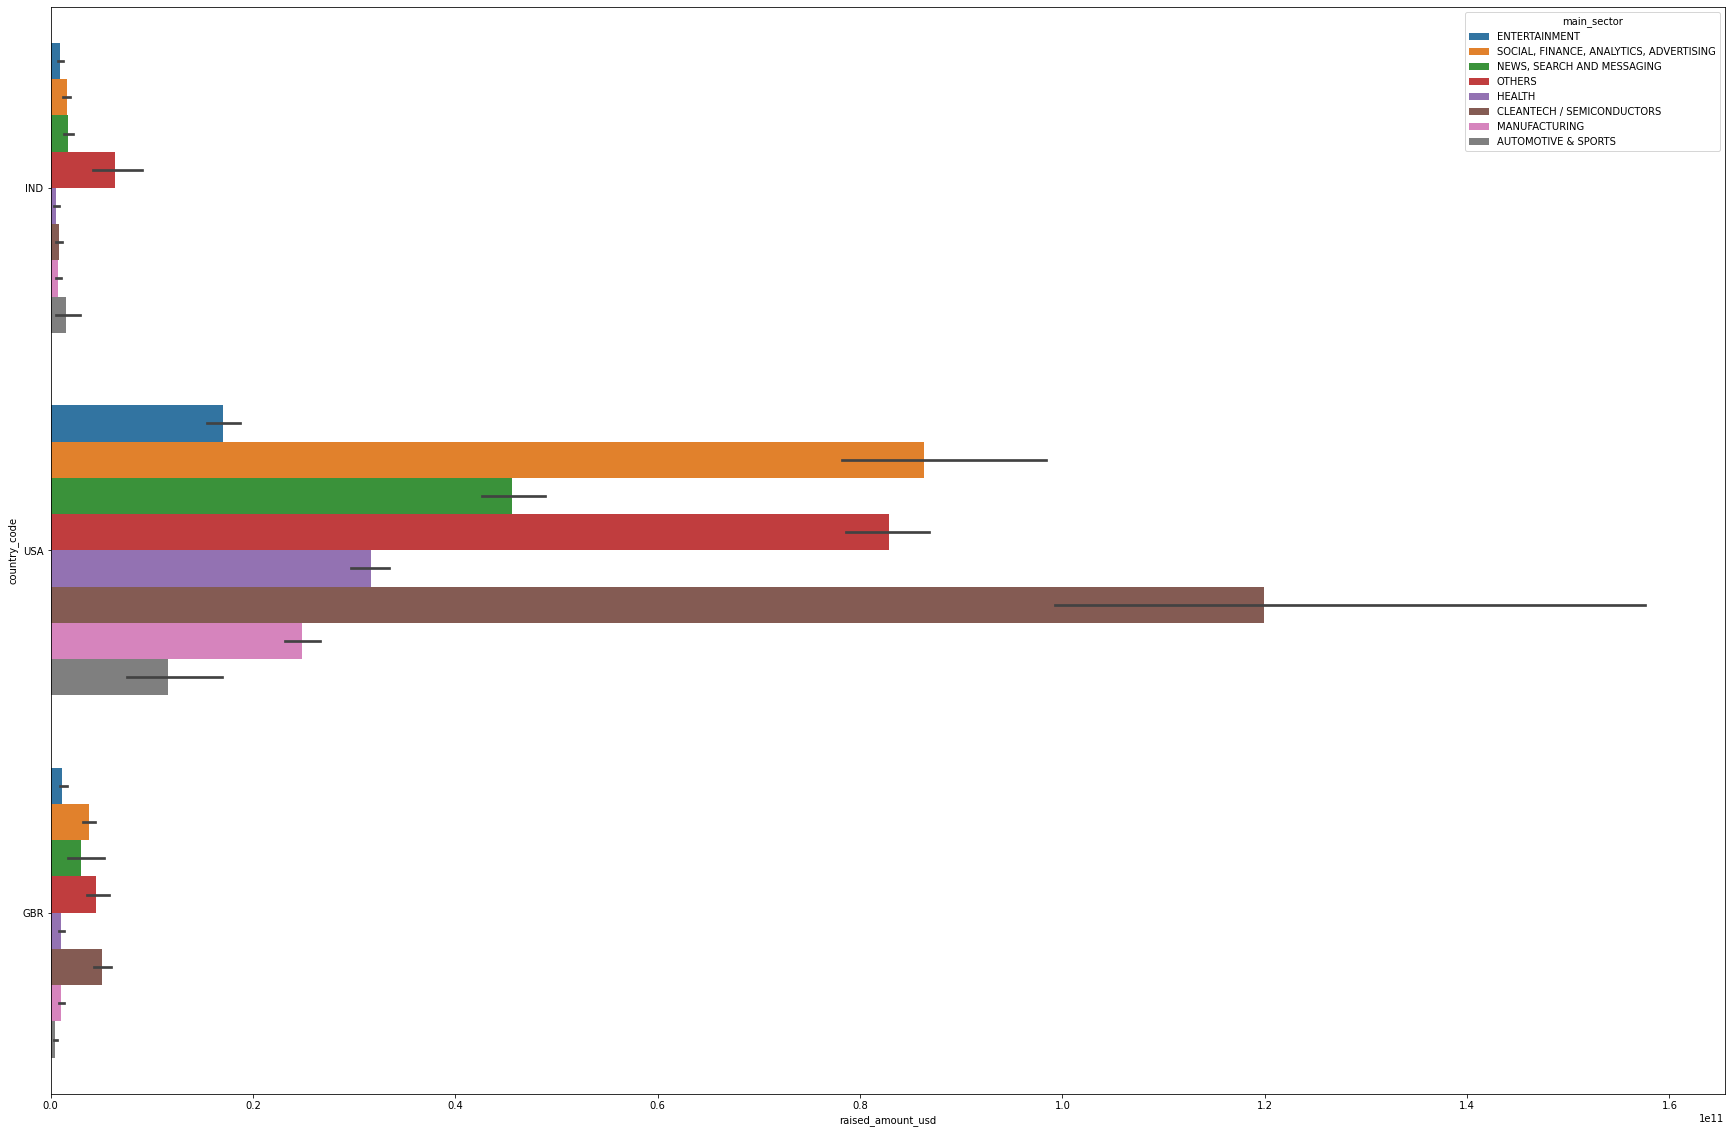

In [173]:
top_three_countries = countries[countries.country_code.isin(['USA','GBR','IND'])]
plt.figure(figsize=(30, 20))
sns.barplot(y='country_code', x='raised_amount_usd', hue="main_sector", data=top_three_countries, estimator=np.sum)
plt.show()